In [22]:
library(dplyr)
library(lme4)
library(nlme)
library(purrr)
library(performance)
library(tibble)
library(MuMIn)
library(here)
library(reactablefmtr)
library(emmeans)
library(car)
library(ggplot2)
library(modelr)
library(knitr)

In [23]:
setwd(here::here())

In [24]:
# Load all joined dataset
source("./scripts/code_join_data_full_dataset.R")

In [28]:
# Load custom made functions
source("./R/functions_models.R")
source("./R/function_plots.R")
source("./R/function_validation_plots.R")
source("./R/function_for_inference_emmeans_and_percentage_diff.R")

In [29]:
# set plot dimensions
options(repr.plot.width = 20)
options(repr.plot.height = 8)

__For running each peice of code press shift + Enter__

# __Q1: What is the relative influence of water and/or nutrient availability on tropical dry forest seedling growth and biomass allocation__

## Models

In [30]:
# Take response variables names
response_vars_q1 <-
  set_names(c("total_biomass", "rgr"))

response_vars_q1

total_biomass             rgr 
"total_biomass"           "rgr"

In [31]:
models_q1 <- map(response_vars_q1, ~mixed_model_1(response = .x,
                                                data = data_for_models))

names(models_q1)

[1] "total_biomass" "rgr"

In [32]:
# Log model

## Root-Shoot ratio
model_q1_ratio_log <- lmer(log(root_shoot_ratio) ~ nfixer*treatment +
                                                   init_height +
                                                   (1|spcode),
                         data = data_for_models)

log_models_q1 <- list(model_q1_ratio_log)

names(log_models_q1) <- "root_shoot_ratio_log"

# Append log models to model list
models_q1 <- append(log_models_q1, models_q1)

## Model Assumptions

### Total Biomass

[1] "No variable specified inthe variables argument"


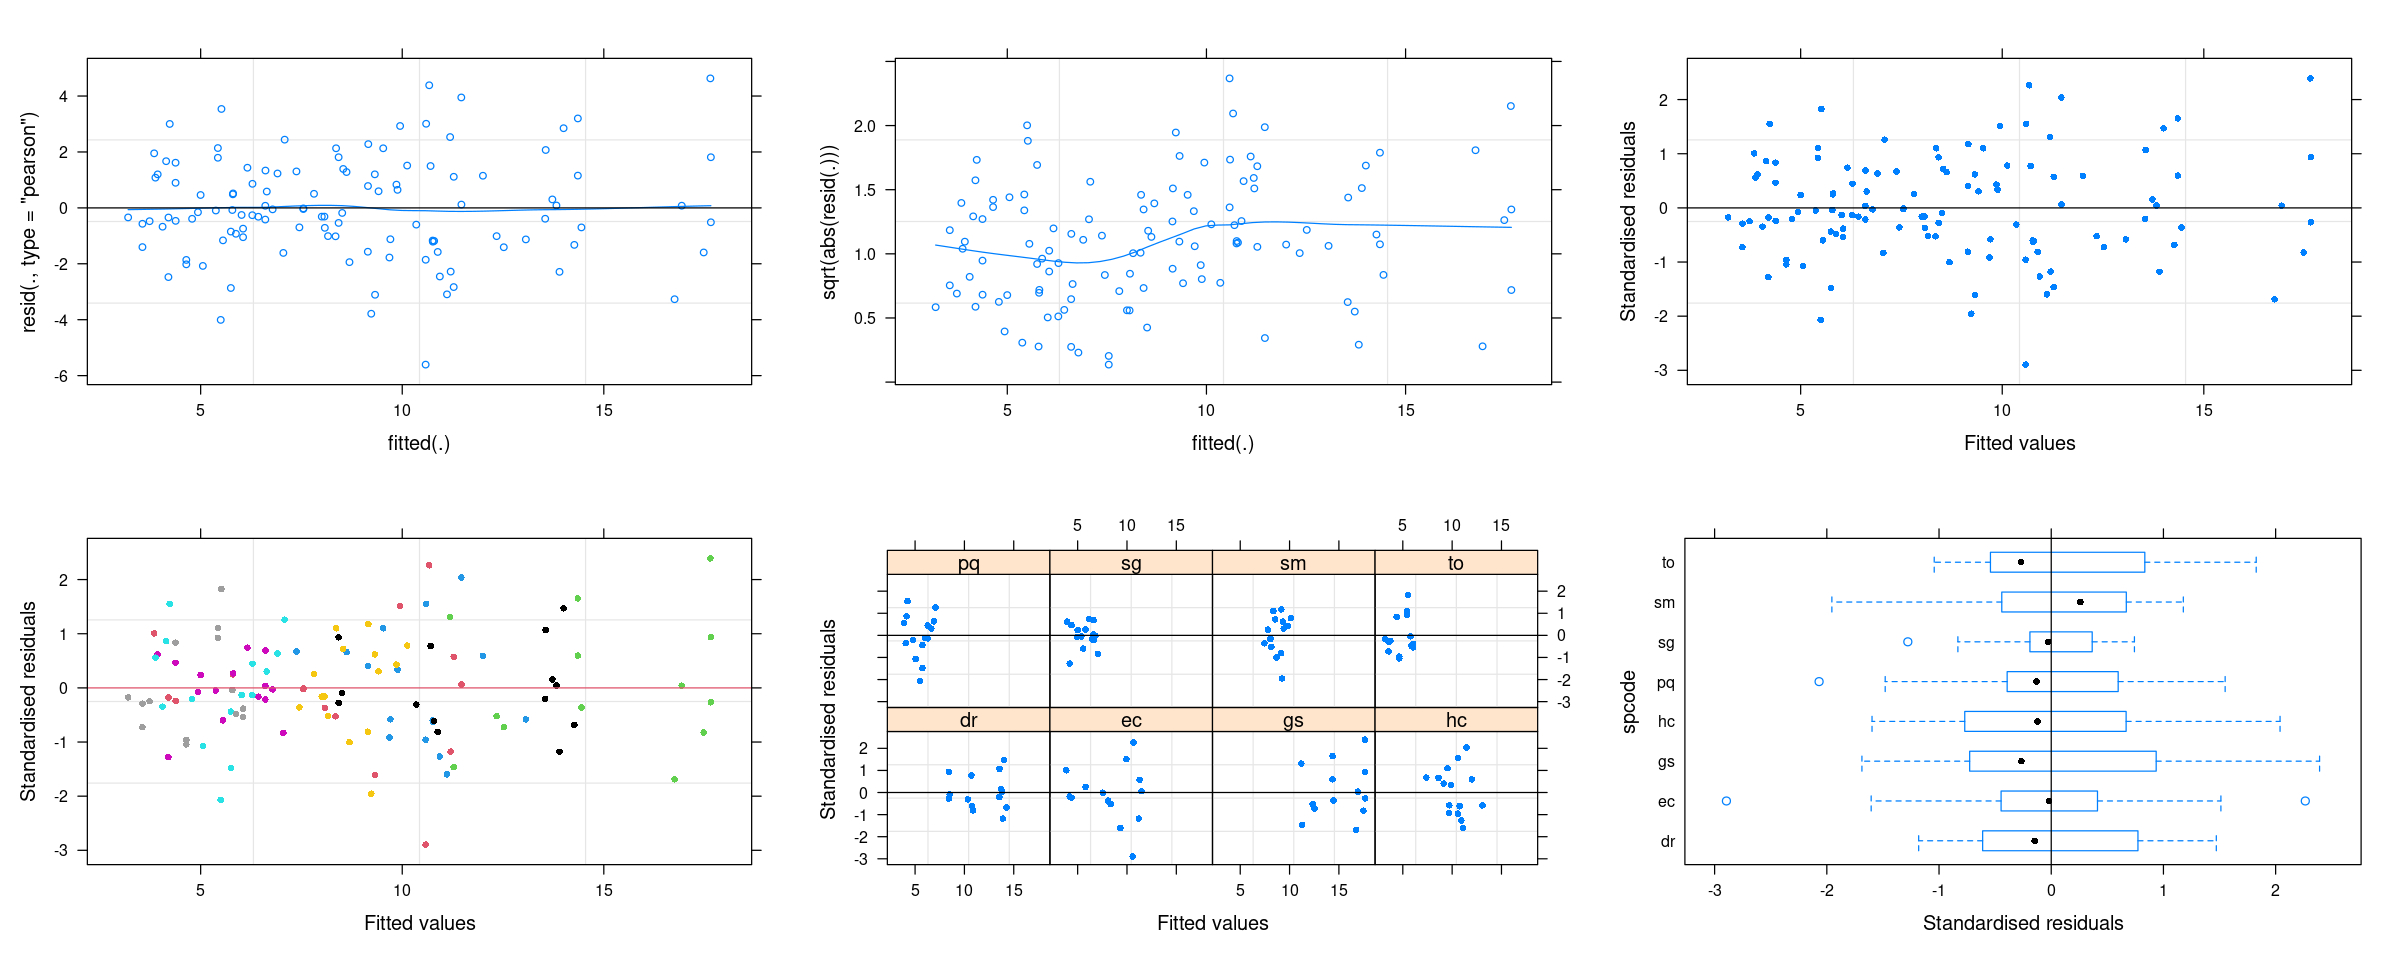

In [33]:
par(mfrow = c(3,3))
validation_plots(models_q1$total_biomass, data = data_for_models,group = "spcode")


### RGR

[1] "No variable specified inthe variables argument"


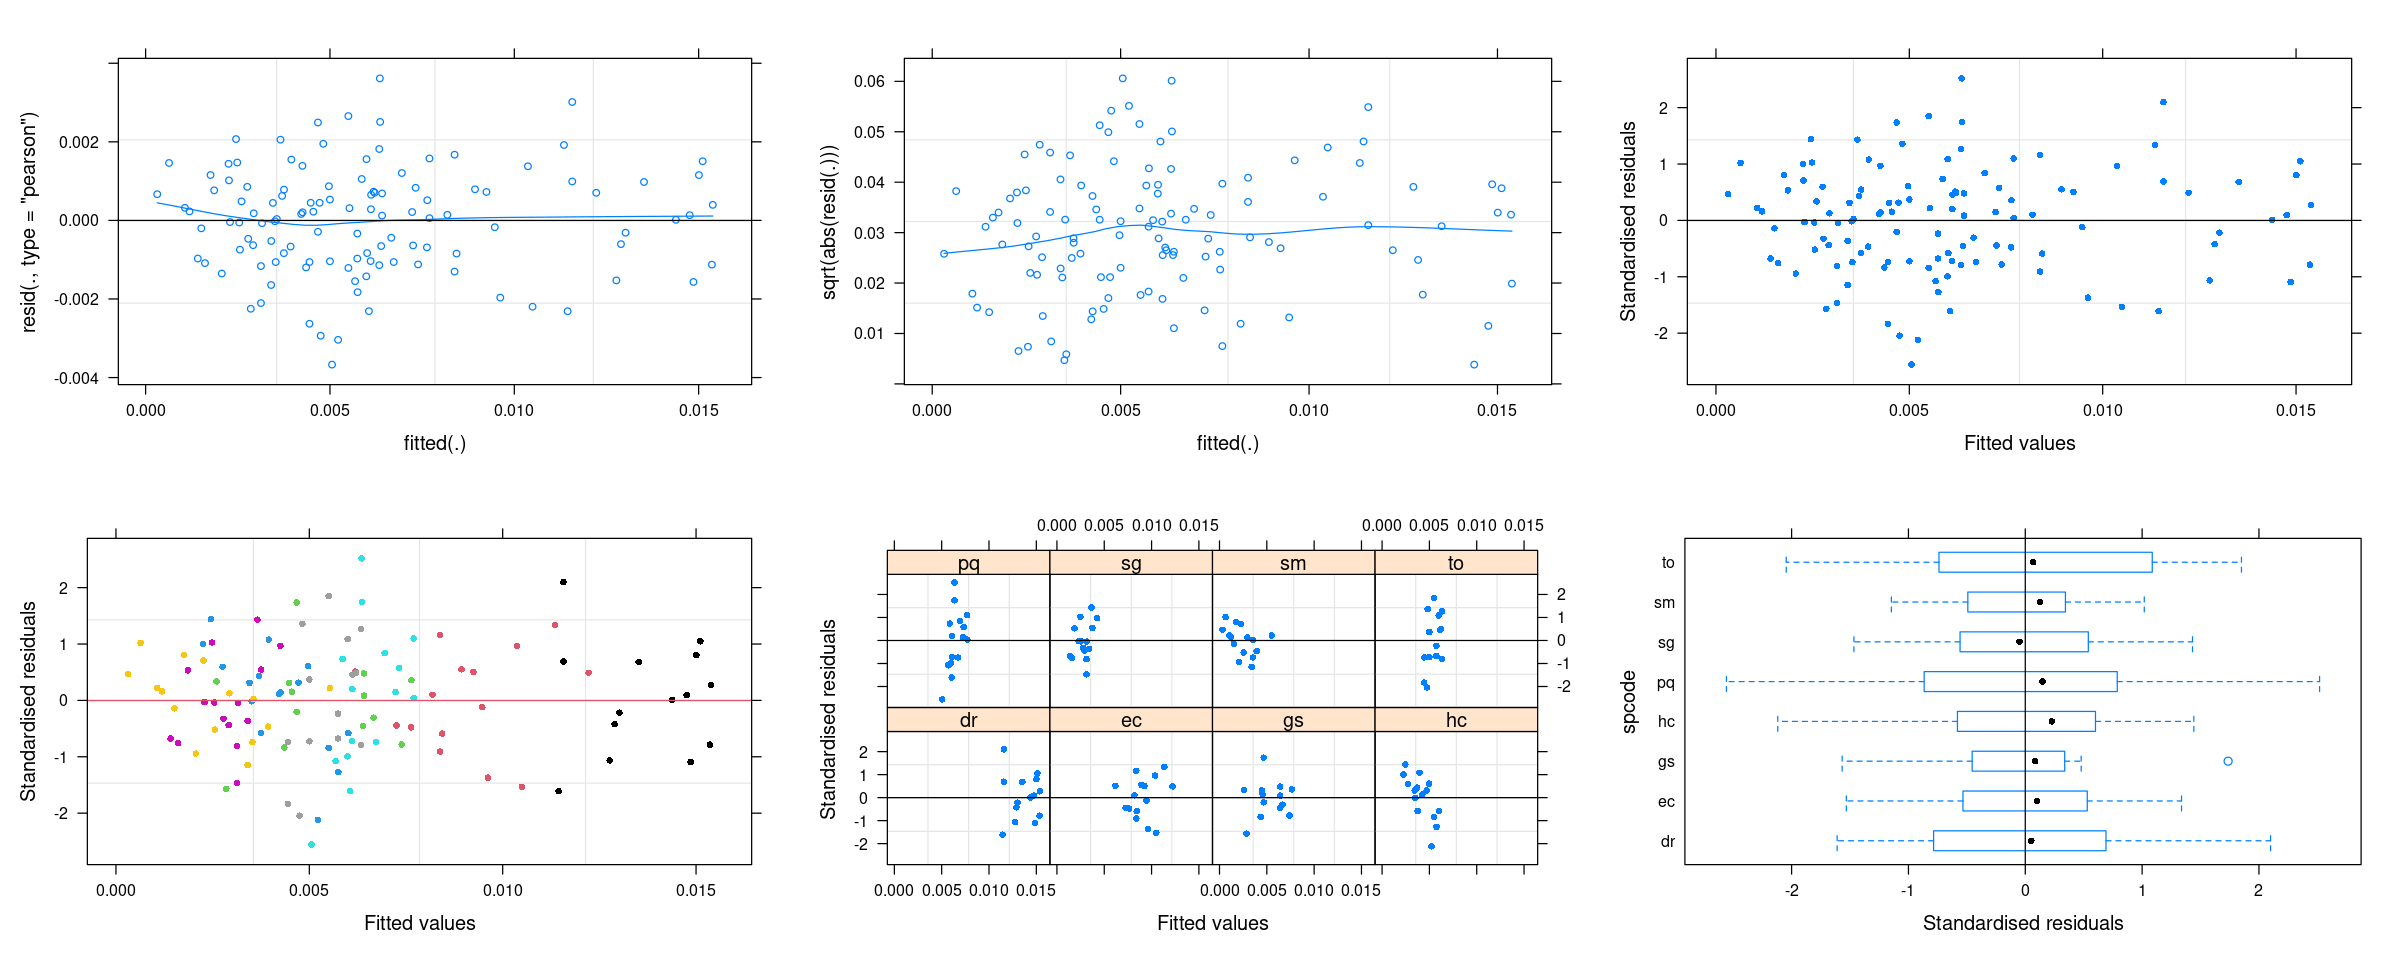

In [34]:
par(mfrow = c(3,3))
validation_plots(models_q1$rgr, data = data_for_models,group = "spcode")

### Root-Shoot ratio

[1] "No variable specified inthe variables argument"


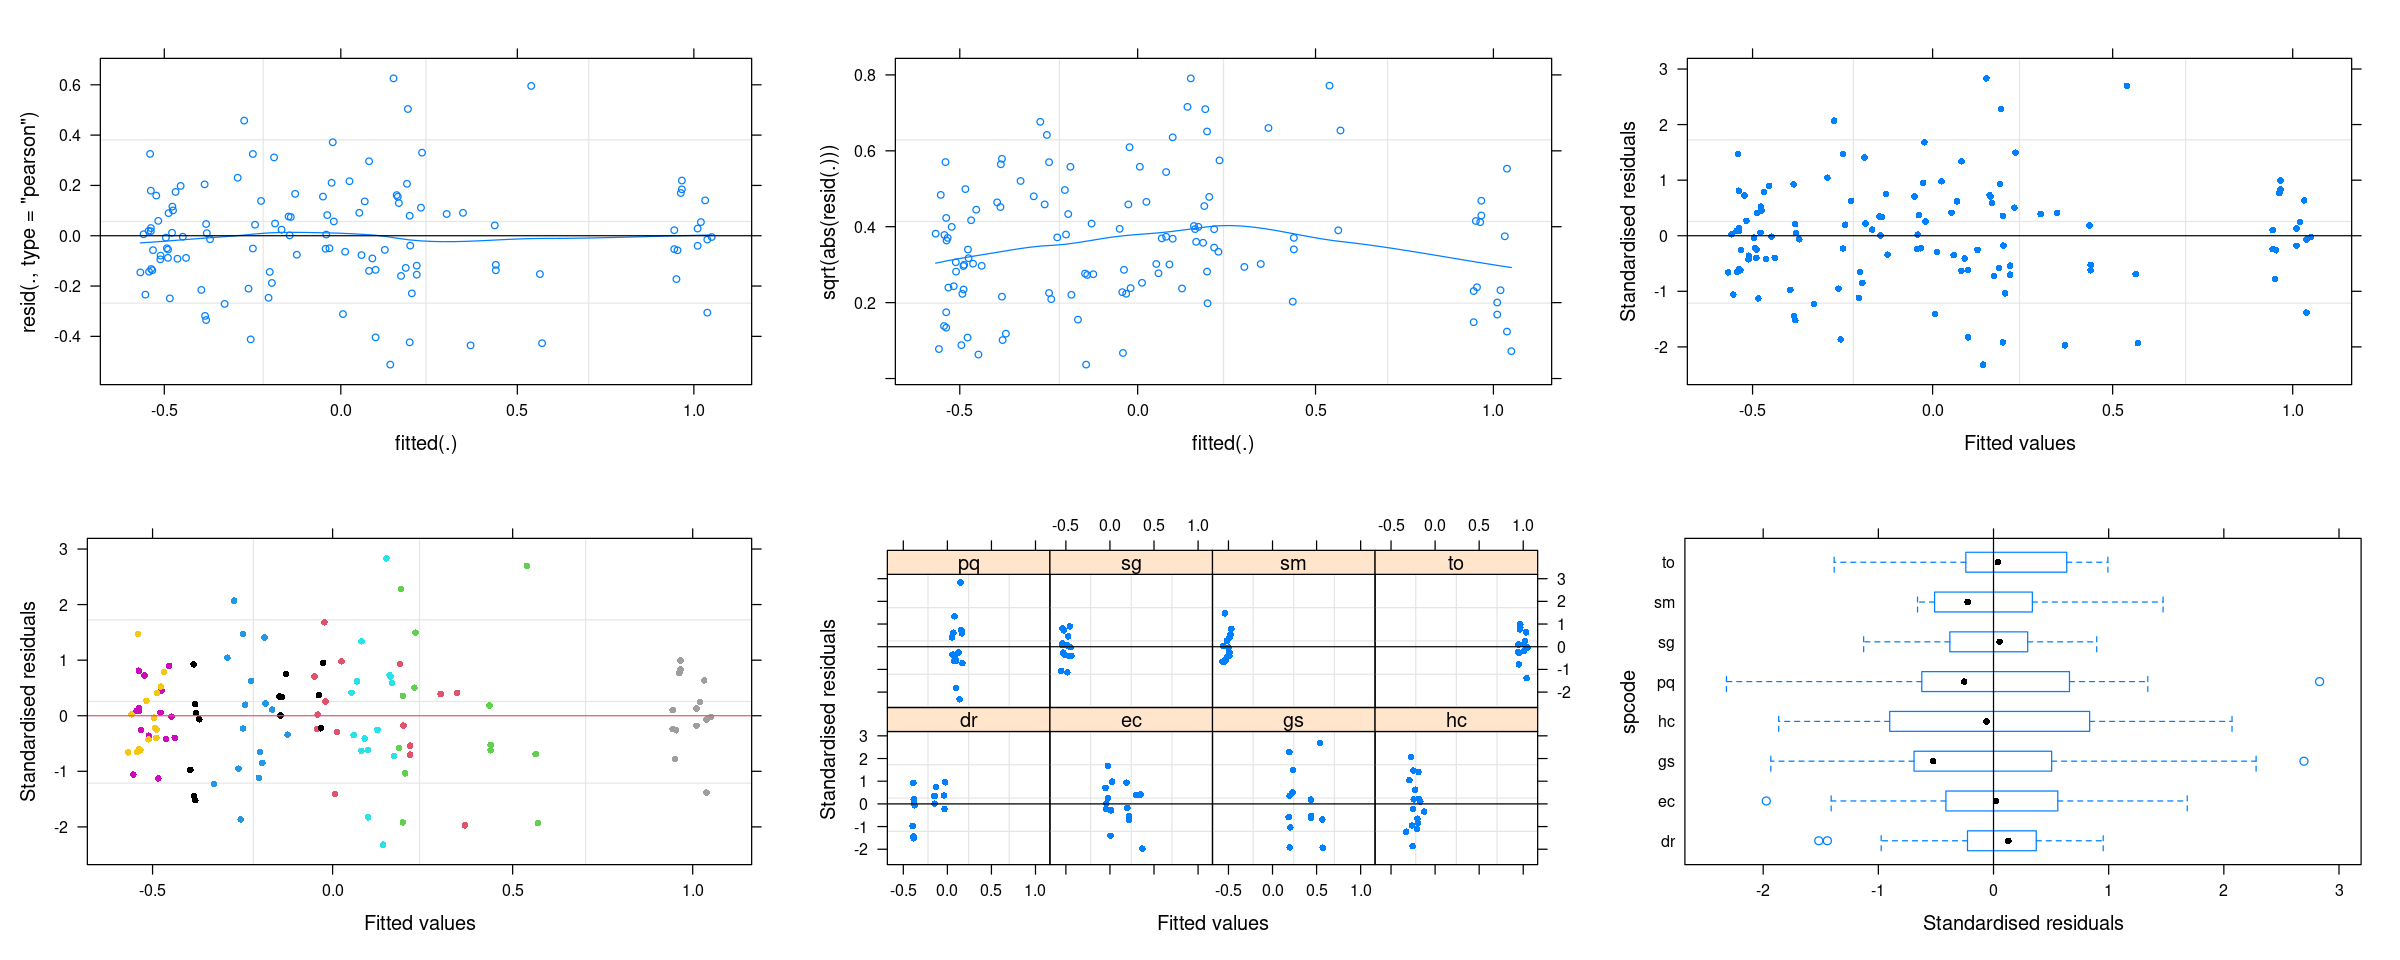

In [35]:
par(mfrow = c(3,3))
validation_plots(models_q1$root_shoot_ratio_log,
                data = data_for_models,
                group = "spcode")

## Model inference

In [36]:
## r2 models
models_q1 %>%

    map(., r2) %>%
    unlist() %>%
    kable()



|                                                   |         x|
|:--------------------------------------------------|---------:|
|root_shoot_ratio_log.R2_conditional.Conditional R2 | 0.8568374|
|root_shoot_ratio_log.R2_marginal.Marginal R2       | 0.0394881|
|total_biomass.R2_conditional.Conditional R2        | 0.8039606|
|total_biomass.R2_marginal.Marginal R2              | 0.4862713|
|rgr.R2_conditional.Conditional R2                  | 0.9016095|
|rgr.R2_marginal.Marginal R2                        | 0.5170700|

### Anova tables

In [15]:
map(models_q1, ~Anova(.x, type = "III", test.statistic = c("F")))

,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.15452871,1,8.397321,0.704036738
nfixer,0.03019342,1,6.268875,0.867528160
treatment,0.69733454,3,102.114416,0.555777495
init_height,0.67701725,1,107.325757,0.412440147
nfixer:treatment,4.49351832,3,102.069497,0.005275981
,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.996277,1,12.061687,0.045076038
treatment,5.763833,3,102.318212,0.001105776


### Post-Hoc: Tukey's test

#### Total Biomass

In [37]:
as_tibble(emmeans(models_q1$total_biomass,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(2:6, round, 6)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”




|contrast                                                   |  estimate|       SE|         df|   t.ratio|  p.value|
|:----------------------------------------------------------|---------:|--------:|----------:|---------:|--------:|
|no_additions nonfixer - plus_nutrients nonfixer            | -1.959660| 0.633208| 102.498048| -3.094815| 0.049954|
|no_additions nonfixer - plus_water nonfixer                | -0.910160| 0.639756| 102.048228| -1.422668| 0.844729|
|no_additions nonfixer - plus_water_nutrients nonfixer      | -2.318565| 0.612759| 102.076599| -3.783814| 0.006142|
|no_additions nonfixer - no_additions fixer                 | -2.314186| 1.943350|   7.010931| -1.190823| 0.911822|
|no_additions nonfixer - plus_nutrients fixer               | -7.881855| 1.961287|   7.276571| -4.018716| 0.052760|
|no_additions nonfixer - plus_water fixer                   | -4.949967| 1.944822|   7.024234| -2.545203| 0.307543|
|no_additions nonfixer - plus_water_nutrients fixer         | -7.89433

#### RGR

In [38]:
as_tibble(emmeans(models_q1$rgr,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()



|contrast                                                   |  estimate|       SE|         df|   t.ratio|  p.value|
|:----------------------------------------------------------|---------:|--------:|----------:|---------:|--------:|
|no_additions nonfixer - plus_nutrients nonfixer            | -0.001213| 0.000469| 102.256988| -2.584803| 0.173608|
|no_additions nonfixer - plus_water nonfixer                |  0.000305| 0.000474| 102.012730|  0.643004| 0.998146|
|no_additions nonfixer - plus_water_nutrients nonfixer      | -0.000993| 0.000454| 102.029106| -2.186103| 0.368833|
|no_additions nonfixer - no_additions fixer                 | -0.004233| 0.002141|   6.398531| -1.976791| 0.552664|
|no_additions nonfixer - plus_nutrients fixer               | -0.007396| 0.002150|   6.506616| -3.439366| 0.116787|
|no_additions nonfixer - plus_water fixer                   | -0.005180| 0.002142|   6.406301| -2.417855| 0.361465|
|no_additions nonfixer - plus_water_nutrients fixer         | -0.00741

#### Root-Shoot Ratio

In [39]:
as_tibble(emmeans(models_q1$root_shoot_ratio_log,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()



|contrast                                                   |  estimate|       SE|         df|   t.ratio|  p.value|
|:----------------------------------------------------------|---------:|--------:|----------:|---------:|--------:|
|no_additions nonfixer - plus_nutrients nonfixer            |  0.075146| 0.072264| 102.185820|  1.039886| 0.967079|
|no_additions nonfixer - plus_water nonfixer                |  0.021272| 0.072971| 102.007104|  0.291517| 0.999991|
|no_additions nonfixer - plus_water_nutrients nonfixer      |  0.087440| 0.069895| 102.019228|  1.251026| 0.914227|
|no_additions nonfixer - no_additions fixer                 |  0.068534| 0.394409|   6.268875|  0.173763| 0.999999|
|no_additions nonfixer - plus_nutrients fixer               | -0.271412| 0.395557|   6.342565| -0.686152| 0.994435|
|no_additions nonfixer - plus_water fixer                   | -0.158882| 0.394514|   6.274633| -0.402728| 0.999795|
|no_additions nonfixer - plus_water_nutrients fixer         |  0.07284

### Treatment effects

#### Total Biomass

In [42]:
emmeans_table_tidy(models_q1$total_biomass,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x579368f8c2e8>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

#### RGR

In [43]:
emmeans_table_tidy(models_q1$rgr,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x579368f3d0d0>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

#### Root-shoot ratio

In [44]:
emmeans_table_tidy(models_q1$root_shoot_ratio_log,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x57936ac92340>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

## Boxplots Biomass and growth 

In [45]:
# Step done for getting predictions from models for Q1
data_for_predictions <-
    data_for_models %>%

        rownames_to_column("id") %>%

        # Remove unused variables
        dplyr::select(id, spcode, treatment, nfixer, init_height)

In [60]:
# Get predictions
string <- c("models_q1")

data_pred_biomass_growth <-

        # Get models prediction
        gather_predictions(data_for_predictions,

                           # Return predictions of:
                            models_q1$rgr,
                            models_q1$total_biomass,
                            models_q1$root_shoot_ratio_log)   %>%

            # Get fitted values
            pivot_wider(names_from = model, values_from = pred)  %>%
             rename_all(
              funs(

                # rename columns
                stringr::str_to_lower(.) %>%

                # Remove string from name and replace it with pred_
                stringr::str_replace(., c(string), "pred_") %>%

                # Remove dollar sing
                gsub("\\$", "", .))) %>%


        # Back transform log variables
        mutate(pred_root_shoot_ratio = exp(pred_root_shoot_ratio_log)) %>%

        # Select only pred variables
        dplyr::select(-c(init_height, pred_root_shoot_ratio_log))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [61]:
# Generate plot combinations
vars_q1 <-
  crossing(

    # Get all numeric variables to plot (all y)
    as_tibble(t(combn(dplyr::select(data_pred_biomass_growth, where(is.numeric)) %>% names, 1))),

    # Select factor variables to plot
    x_axis_var = dplyr::select(data_pred_biomass_growth, nfixer) %>%  names,
    group_var = dplyr::select(data_pred_biomass_growth, treatment) %>%  names)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


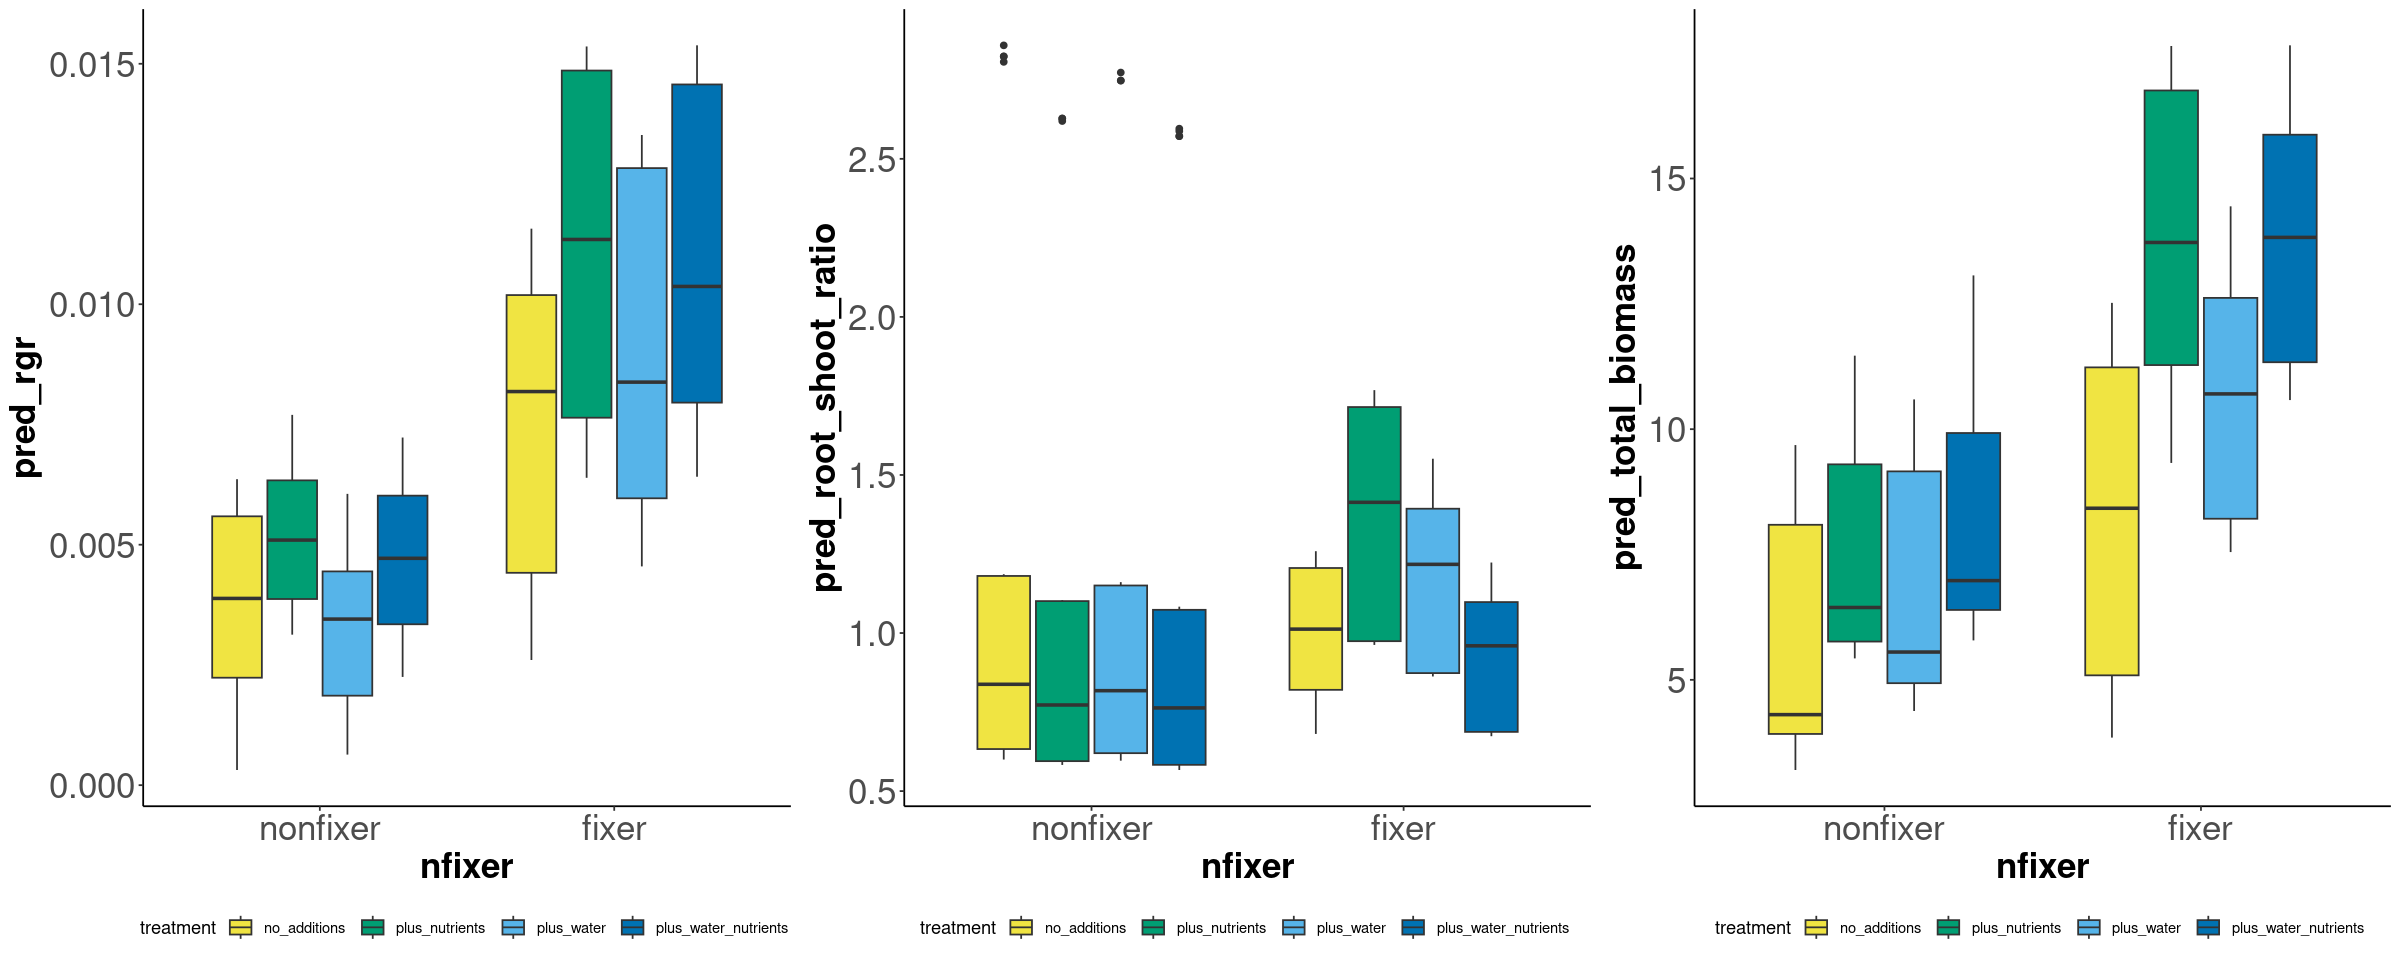

In [62]:
par(mfrow = c(2,2))
vars_q1 %>%
      # Gererate plots
      pmap( ~boxplot_plot_pmap(data = data_pred_biomass_growth,
                                y = !!sym(..1), x = !!sym(..2),
                                fill = !!sym(..3))) %>%
      cowplot::plot_grid(plotlist = ., ncol = 3)